## loading socal roadway network with osmnx

if you haven't installed osmnx locally, run the cell below once

In [ ]:
! pip install osmnx

---

In [15]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx

# loading network

In [2]:
path = 'change this to the relative path to the socal_street_network.graphml file'
path = '/Users/jarvis/Desktop/CE 88/project/data/socal_street_network_w_chargers.graphml'
# load the network file using osmnx
G = ox.io.load_graphml(path)

In [3]:
G

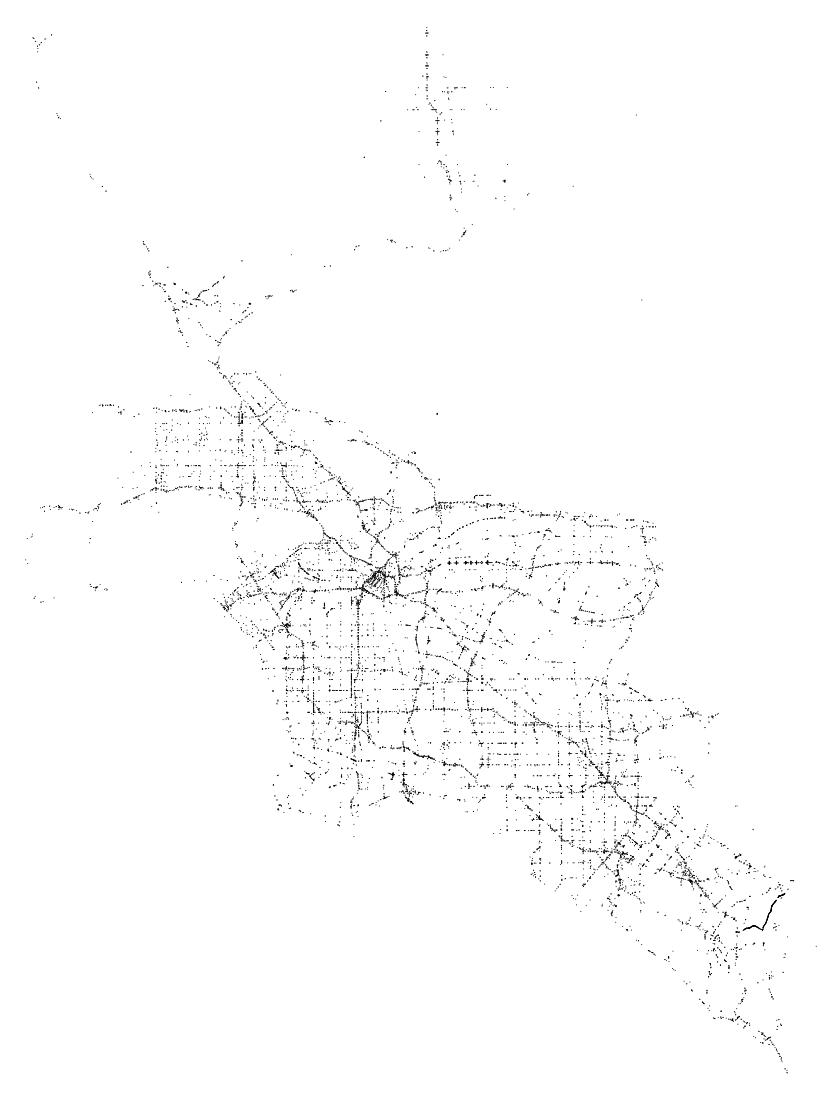

In [3]:
# show the nodes in the network 
# these nodes are mostly intersections and ends of the street segments
fig, ax = ox.plot_graph(G, 
                        bgcolor="white", edge_color="white", node_color="black", 
                        node_size=1, 
                        figsize=(20, 20))

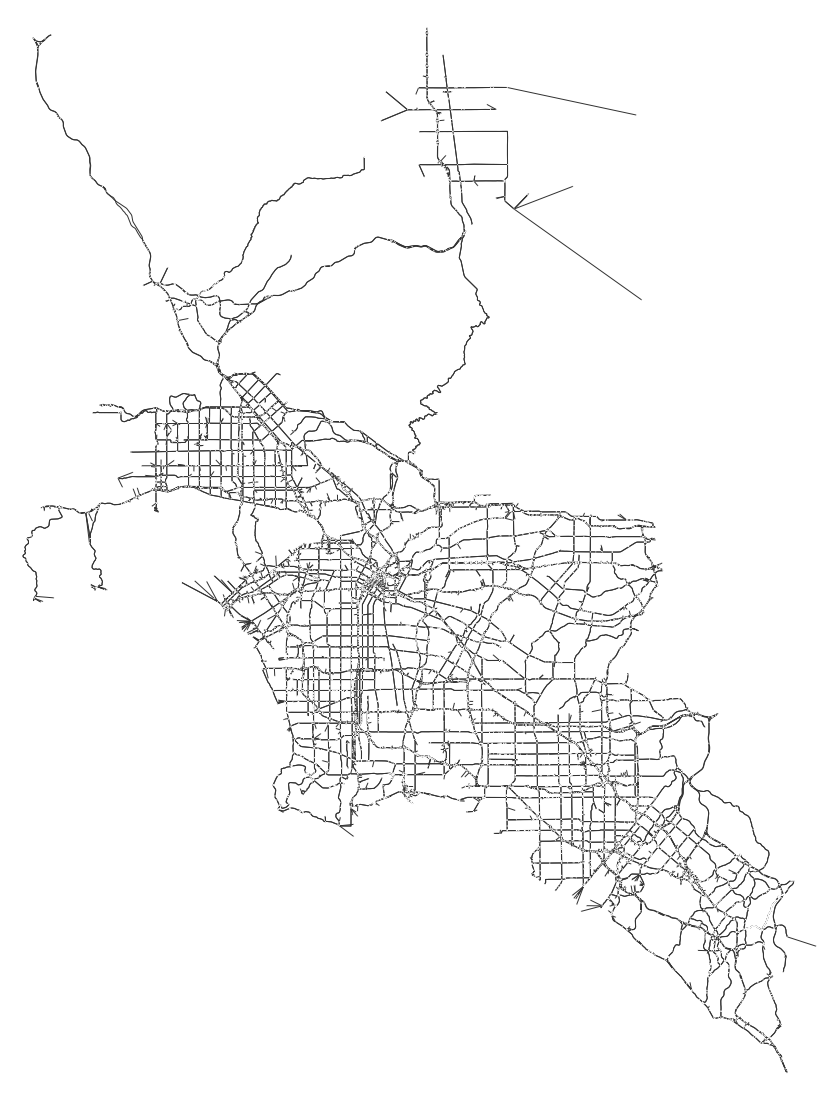

In [4]:
# plot the network
fig, ax = ox.plot_graph(G, 
                        bgcolor="#FFFFFF", edge_color="#333333", node_color="white", 
                        node_size=1, 
                        figsize=(20, 20))

### some basic info

see doc [here](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.stats.basic_stats) for units and metrics on the output below

In [5]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
print('network area = ', graph_area_m)
ox.basic_stats(G, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

network area =  1.1982306598425763


/Users/jarvis/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/osmnx/simplification.py:450: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  chunks = get_chunks(gs_nodes.loc[idx].buffer(tolerance).values, n)
/Users/jarvis/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/osmnx/simplification.py:399: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return _merge_nodes_geometric(G, tolerance).centroid


{'n': 16753,
 'm': 26644,
 'k_avg': 3.180803438190175,
 'intersection_count': 12581,
 'streets_per_node_avg': 2.4634990747925745,
 'streets_per_node_counts': {0: 0,
  1: 1617,
  2: 670,
  3: 9488,
  4: 2298,
  5: 99,
  6: 22,
  7: 1,
  8: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.09652002626395273,
  2: 0.0399928371038023,
  3: 0.5663463260311586,
  4: 0.13716946218587717,
  5: 0.005909389363099146,
  6: 0.0013131976362442547,
  7: 5.969080164746613e-05,
  8: 0.0001790724049423984},
 'edge_length_total': 12269520.456421481,
 'edge_length_avg': 460.49844079047745,
 'street_length_total': 10476504.266421402,
 'street_length_avg': 449.4039235767588,
 'street_segments_count': 23312,
 'node_density_km': 13981448281.586294,
 'intersection_density_km': 10499647873.851679,
 'edge_density_km': 10239698304860.145,
 'street_density_km': 8743311799247.239,
 'circuity_avg': 103200.05984918546,
 'self_loop_proportion': 7.506380423359856e-05,
 'clean_intersection_count': 1,
 'clean_intersec

In [22]:
a = {"a":1}
a['a']

1

# nodes

In [40]:
[x for x,y in G.nodes(data=True) if y['ev_charger'] == 'yes']

KeyError: 'ev_charger'

In [25]:
def filter_charger_node(n):
    return n['ev_charger'] == 'yes'

In [26]:
charger_G = nx.subgraph_view(G, filter_node=filter_charger_node)
charger_G.nodes()

TypeError: 'int' object is not subscriptable

In [33]:
dum = nx.path_graph(6)
def filter_node(n1):
    return n1 == 4

view = nx.subgraph_view(dum, filter_node=filter_node)
view.nodes(data=True)


NodeDataView({4: {}})

In [29]:
dum.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}})

In [30]:
G.nodes(data=True)

NodeDataView({14840398: {'y': 33.735608, 'x': -117.8191526, 'ref': '101B', 'highway': 'motorway_junction', 'street_count': 3}, 14840399: {'y': 33.7139285, 'x': -117.7873083, 'ref': '99', 'highway': 'motorway_junction', 'street_count': 3}, 15369419: {'y': 33.6999811, 'x': -117.8854249, 'highway': 'traffic_signals', 'street_count': 5}, 17411422: {'y': 33.6612349, 'x': -117.7848054, 'street_count': 3}, 17411736: {'y': 33.5972999, 'x': -117.6756973, 'street_count': 3}, 17411739: {'y': 33.6033048, 'x': -117.6888318, 'street_count': 3}, 17411740: {'y': 33.606729, 'x': -117.6946054, 'ref': '90', 'highway': 'motorway_junction', 'street_count': 3}, 19344607: {'y': 33.4989334, 'x': -117.6586379, 'street_count': 3}, 19344785: {'y': 33.4362248, 'x': -117.6186461, 'street_count': 3}, 19344845: {'y': 33.5245897, 'x': -117.6676201, 'ref': '83', 'highway': 'motorway_junction', 'street_count': 3}, 19344864: {'y': 33.4150387, 'x': -117.6032519, 'street_count': 3}, 19345060: {'y': 33.4418005, 'x': -117.6